# Enegia de raios cósmicos
Para raios cósmicos com energia acima de 1 EeV até $\infty$, a lei de potência que seguem é:
$$f(E)\,dE = A\, E^{-2,6}\, dE,$$
em que $A = 1,6$ é a constante de normalização.

Queremos amostrar energias aleatórias segundo a seguinte expressão, obtida do método da inversão:
$$E^* = \left(\frac{1}{1-u^*}\right)^{1/1,6},$$
em que $u^*$ é uma variável uniformemente distribuída entre $[0,1]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
num = 1000
np.random.seed(1976)
u = np.random.random_sample(num)
np.random.seed()

In [37]:
E = (1/(1-u))**(1/1.6)

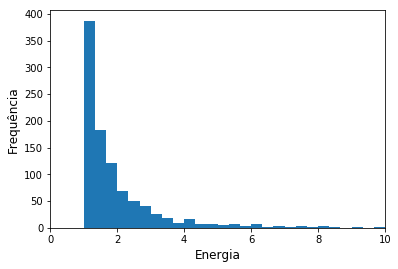

In [38]:
# Histograma de E
div = 500
plt.hist(E, bins = div)
plt.xlabel('Energia', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.xlim(0,10)
plt.show()

Vemos que segue o mesmo comportamento da lei de potência para energias de raios cósmicos.

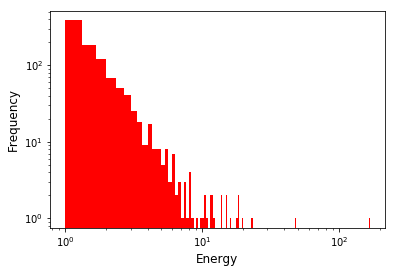

In [39]:
# Histograma em loglog
plt.hist(E, bins = div, color = 'r')
plt.xlabel('Energy', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xscale('log', basex = 10)
plt.yscale('log', basey = 10)
plt.show()

Observando um comportamento linear no histograma acima, podemos traçar uma reta.

In [40]:
y_bruto, x_bruto = np.histogram(E, bins = div)

Geramos um histograma em que a primeira entrada (y) é o tamanho de cada barra do histograma e a segunda entrada (x), os bins. Como precisamos aplicar log nestes valores de y, queremos selecionar somente aqueles y > 0.
Além disso, a tendência linear aplica-se somente para os primeiros valores (E < 10).

In [45]:
x = []
y = []
for i in range(len(y_bruto)):
    if(y_bruto[i] > 0 and x_bruto[i] < 10):
        x.append(np.log10(x_bruto[i]))
        y.append(np.log10(y_bruto[i]))
        
x = np.array(x)
y = np.array(y)

In [46]:
# Faz o ajuste polinomial de grau 1 com x e y
coef = np.polyfit(x, y, 1)
pol = np.poly1d(coef)
func = str(pol)
print(func)

 
-2.717 x + 2.664


In [47]:
# Calcula y pelo ajuste
y_ajuste = pol(x)

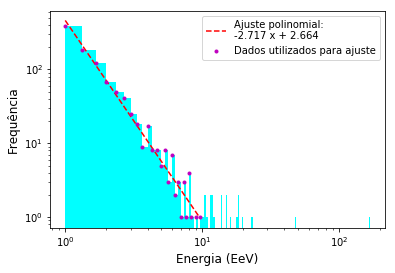

In [48]:
# Faz o histograma de E
plt.hist(E, bins = div, color = '#00FFFF')
# Plota a reta com x e y_ajuste
plt.plot(10**x, 10**(y_ajuste), '--', color = 'r', label = 'Ajuste polinomial:'+func)
# Plota os pontos que foram utilizados
plt.plot(10**x, 10**(y), '.', color = 'm', label = 'Dados utilizados para ajuste')
plt.xlabel('Energia (EeV)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.xscale('log', basex = 10)
plt.yscale('log', basey = 10)
plt.legend(fontsize = 10)
plt.show()

### Outro histograma de energia
$$N(E)\,dE = A\, E^{-3}\, dE$$
em que $A = 2,0002$ é a constante de normalização.

Queremos amostrar energias aleatórias segundo a seguinte expressão, obtida do método da inversão:
$$E^* = \left(\frac{1}{1-u^*}\right)^{1/2},$$
em que $u^*$ é uma variável uniformemente distribuída entre $[0,1]$.

In [6]:
np.random.seed(1599)
u_new = np.random.random_sample(30)
np.random.seed()

E_new = (1/(1-u_new))**(1/2)

print(E_new.round(1))

[1.2 1.2 1.  1.7 1.2 2.2 2.  4.5 1.3 2.1 1.6 1.4 1.6 1.8 1.6 1.2 1.4 1.4
 3.4 1.2 1.6 2.5 1.3 1.6 1.2 2.  1.2 1.1 2.2 1. ]


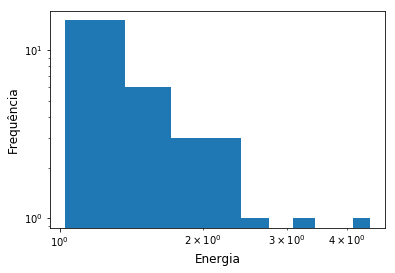

In [12]:
# Histograma de E
div = 10
plt.hist(E_new, bins = div)
plt.xlabel('Energia', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.xscale('log', basex = 10)
plt.yscale('log', basey = 10)
plt.show()

### Histograma de exponencial
$$N(x)\,dx = A\, e^{-x}\, dx$$
em que $A = 1$ é a constante de normalização.

Queremos amostrar energias aleatórias segundo a seguinte expressão, obtida do método da inversão:
$$x^* = -ln(1-u^*),$$
em que $u^*$ é uma variável uniformemente distribuída entre $[0,1]$.

In [17]:
A = 1-np.exp(-10)
print(round(A,3))

1.0


In [26]:
np.random.seed(1998)
v_new = np.random.random_sample(30)
np.random.seed()

x_new = -np.log(1-v_new)

print(x_new.round(1))

[0.8 1.4 0.3 1.5 0.4 1.6 0.4 0.6 0.4 0.6 0.9 0.1 0.  1.7 0.5 1.3 0.5 0.8
 0.3 1.7 1.4 1.6 1.1 0.8 1.5 3.3 3.1 0.8 0.3 0.3]


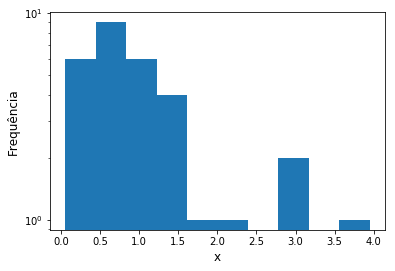

In [23]:
# Histograma de x
div = 10
plt.hist(x_new, bins = div)
plt.xlabel('x', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
#plt.xscale('log', basex = 10)
plt.yscale('log', basey = 10)
plt.show()